In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sns
from tqdm.notebook import tqdm
%matplotlib inline

In [2]:
data = pd.read_csv('dataset-har-PUC-Rio-ugulino.csv', sep=';', engine='python')

In [3]:
type(data)

pandas.core.frame.DataFrame

In [4]:
data.head()

,user,gender,age,how_tall_in_meters,weight,body_mass_index,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,y4,z4,class
0,debora,Woman,46,"1,62",75,"28,6",-3,92,-63,-23,18,-19,5,104,-92,-150,-103,-147,sitting
1,debora,Woman,46,"1,62",75,"28,6",-3,94,-64,-21,18,-18,-14,104,-90,-149,-104,-145,sitting
2,debora,Woman,46,"1,62",75,"28,6",-1,97,-61,-12,20,-15,-13,104,-90,-151,-104,-144,sitting
3,debora,Woman,46,"1,62",75,"28,6",-2,96,-57,-15,21,-16,-13,104,-89,-153,-103,-142,sitting
4,debora,Woman,46,"1,62",75,"28,6",-1,96,-61,-13,20,-15,-13,104,-89,-153,-104,-143,sitting


user (text)

gender (text)

age (integer)

how_tall_in_meters (real)

weight (int)

body_mass_index (real)

x1 (type int, contains the read value of the axis 'x' of the 1st accelerometer, mounted on waist)

y1 (type int, contains the read value of the axis 'y' of the 1st accelerometer, mounted on waist)

z1 (type int, contains the read value of the axis 'z' of the 1st accelerometer, mounted on waist)

x2 (type int, contains the read value of the axis 'x' of the 2nd accelerometer, mounted on the left thigh)

y2 (type int, contains the read value of the axis 'y' of the 2nd accelerometer, mounted on the left thigh)

z2 (type int, contains the read value of the axis 'z' of the 2nd accelerometer, mounted on the left thigh)

x3 (type int, contains the read value of the axis 'x' of the 3rd accelerometer, mounted on the right ankle)

y3 (type int, contains the read value of the axis 'y' of the 3rd accelerometer, mounted on the right ankle)

z3 (type int, contains the read value of the axis 'z' of the 3rd accelerometer, mounted on the right ankle)

x4 (type int, contains the read value of the axis 'x' of the 4th accelerometer, mounted on the right upper-arm)

y4 (type int, contains the read value of the axis 'y' of the 4th accelerometer, mounted on the right upper-arm)

z4 (type int, contains the read value of the axis 'z' of the 4th accelerometer, mounted on the right upper-arm)

Задача заключается в распозновании человеческой деятельности на основании показаний 4 акселерометров закрепленных на человеке и информации о данном человеке.

Всего данная задача включает 5 классов: sitting-down, standing-up, standing, walking, и sitting

In [5]:
data.describe()

,age,weight,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,y4
count,165633.000000,165633.000000,165633.000000,165633.000000,165633.000000,165633.000000,165633.000000,165633.000000,165633.000000,165633.000000,165633.000000,165633.000000,165633.000000
mean,38.265146,70.819408,-6.649327,88.293667,-93.164611,-87.827504,-52.065047,-175.055200,17.423515,104.517167,-93.881726,-167.641448,-92.625171
std,13.184091,11.296527,11.616238,23.895829,39.409423,169.435194,205.159763,192.816615,52.635388,54.155843,45.389646,38.311342,19.968610
min,28.000000,55.000000,-306.000000,-271.000000,-603.000000,-494.000000,-517.000000,-617.000000,-499.000000,-506.000000,-613.000000,-702.000000,-526.000000
25%,28.000000,55.000000,-12.000000,78.000000,-120.000000,-35.000000,-29.000000,-141.000000,9.000000,95.000000,-103.000000,-190.000000,-103.000000
50%,31.000000,75.000000,-6.000000,94.000000,-98.000000,-9.000000,27.000000,-118.000000,22.000000,107.000000,-90.000000,-168.000000,-91.000000
75%,46.000000,83.000000,0.000000,101.000000,-64.000000,4.000000,86.000000,-29.000000,34.000000,120.000000,-80.000000,-153.000000,-80.000000
max,75.000000,83.000000,509.000000,533.000000,411.000000,473.000000,295.000000,122.000000,507.000000,517.000000,410.000000,-13.000000,86.000000


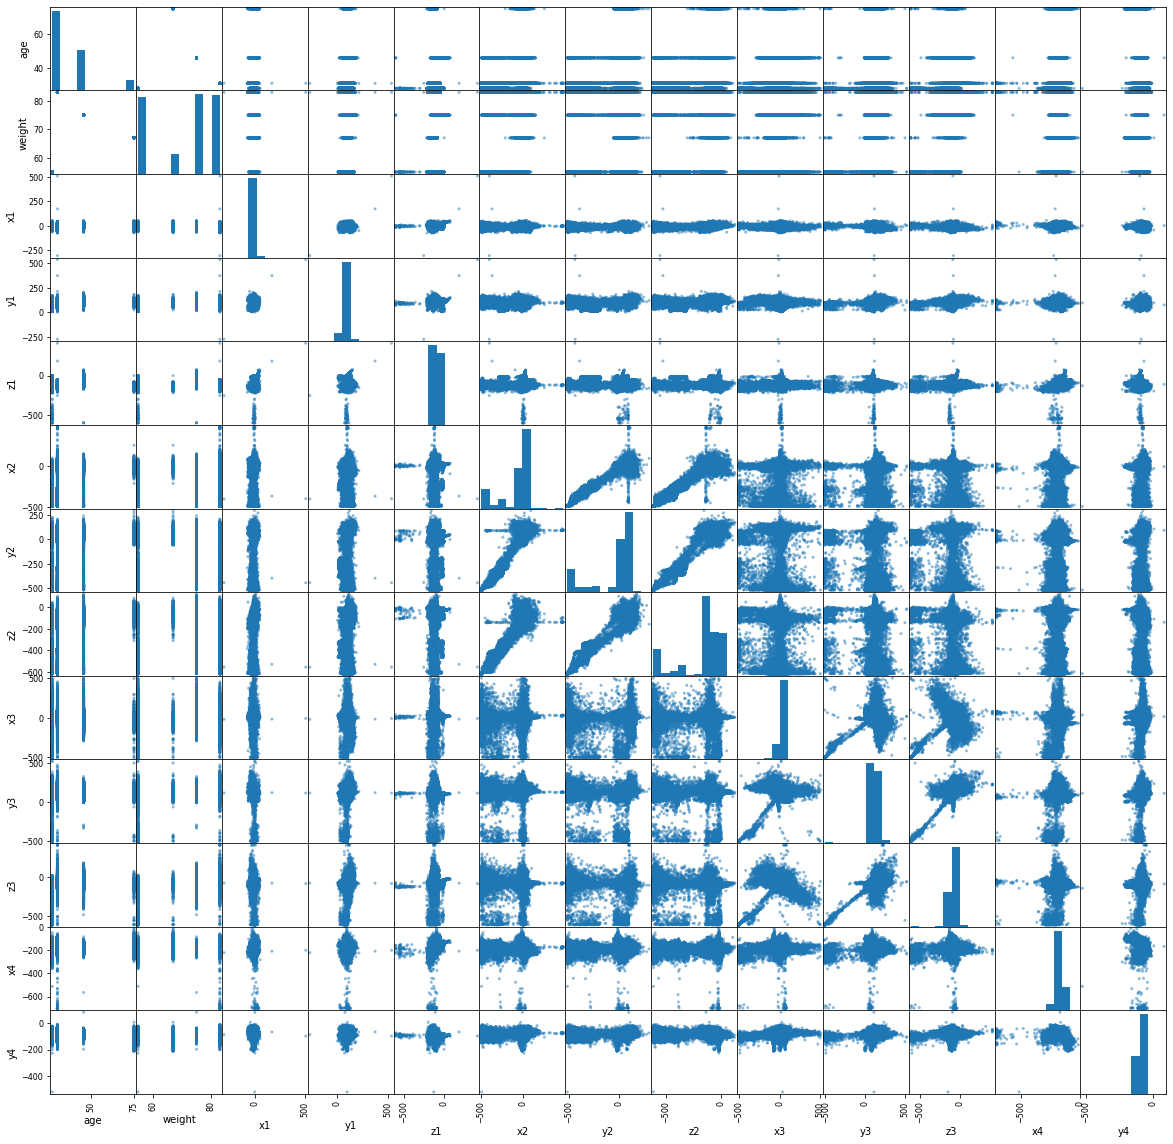

In [6]:
from pandas.plotting import scatter_matrix
scatter_matrix(data, figsize = (20, 20))
pass

In [7]:
data.corr()

,age,weight,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,y4
age,1.000000,0.137255,0.025751,0.209471,-0.094746,0.344190,0.346636,0.382727,-0.238098,0.020281,0.016120,0.095794,-0.265529
weight,0.137255,1.000000,0.202614,0.175923,-0.093062,0.370359,0.372679,0.355114,0.112893,0.039509,0.196375,0.216680,-0.124922
x1,0.025751,0.202614,1.000000,0.345808,0.030417,0.198233,0.202451,0.251139,0.071208,-0.136540,0.004170,0.099018,-0.142552
y1,0.209471,0.175923,0.345808,1.000000,-0.515961,0.043861,0.138219,-0.030179,-0.181574,0.191618,0.109627,-0.290458,0.228997
z1,-0.094746,-0.093062,0.030417,-0.515961,1.000000,0.109971,0.017749,0.217290,0.130282,-0.118961,0.124273,0.506287,-0.405502
x2,0.344190,0.370359,0.198233,0.043861,0.109971,1.000000,0.977116,0.953084,0.008023,-0.140456,0.107520,0.157007,-0.239836
y2,0.346636,0.372679,0.202451,0.138219,0.017749,0.977116,1.000000,0.918648,0.006359,-0.095988,0.120384,0.081715,-0.154378
z2,0.382727,0.355114,0.251139,-0.030179,0.217290,0.953084,0.918648,1.000000,0.006651,-0.200238,0.079059,0.287828,-0.389086
x3,-0.238098,0.112893,0.071208,-0.181574,0.130282,0.008023,0.006359,0.006651,1.000000,0.328425,0.271061,0.166694,0.042718
y3,0.020281,0.039509,-0.136540,0.191618,-0.118961,-0.140456,-0.095988,-0.200238,0.328425,1.000000,0.670928,-0.111224,0.323934


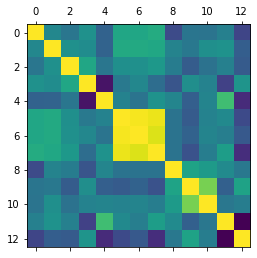

In [8]:
plt.matshow(data.corr())
plt.show()

# Подготовка данных

In [9]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']
print(categorical_columns)
print(numerical_columns)

['user', 'gender', 'how_tall_in_meters', 'body_mass_index', 'z4', 'class']
['age', 'weight', 'x1', 'y1', 'z1', 'x2', 'y2', 'z2', 'x3', 'y3', 'z3', 'x4', 'y4']


In [10]:
for c in categorical_columns:
    print(c, data[c].unique())

user ['debora' 'katia' 'wallace' 'jose_carlos']
gender ['Woman' 'Man']
how_tall_in_meters ['1,62' '1,58' '1,71' '1,67']
body_mass_index ['28,6' '22,0' '28,4' '24,0']
z4 ['-147' '-145' '-144' '-142' '-143' '-146' '-138' '-139' '-141' '-133'
 '-134' '-135' '-140' '-137' '-148' '-151' '-149' '-150' '-152' '-156'
 '-157' '-155' '-154' '-153' '-158' '-159' '-162' '-163' '-161' '-160'
 '-164' '-165' '-136' '-126' '-125' '-122' '-132' '-167' '-170' '-169'
 '-175' '-173' '-166' '-168' '-171' '-172' '-174' '-179' '-177' '-176'
 '-127' '-131' '-184' '-181' '-178' '-180' '-106' '-114' '-116' '-115'
 '-89' '-79' '-93' '-78' '-128' '-109' '-113' '-119' '-102' '-111' '-103'
 '-130' '-129' '-182' '-121' '-186' '-183' '-187' '-190' '-188' '-189'
 '-185' '-192' '-191' '-193' '-194' '-197' '-196' '-201' '-251' '-195'
 '-199' '-198' '-123' '-124' '-112' '-118' '-120' '-99' '-95' '-68' '-110'
 '-117' '-96' '-100' '-105' '-92' '-88' '-107' '-213' '-108' '-104' '-98'
 '-94' '-91' '-97' '-69' '-101' '-86' '-

In [11]:
data.isnull().values.any()

False

In [12]:
data.isna().values.any()

False

In [13]:
data['how_tall_in_meters'] = data['how_tall_in_meters'].str.replace(',', '.').astype('float')

In [14]:
data['body_mass_index'] = data['body_mass_index'].str.replace(',', '.').astype('float')

In [15]:
data['z4'] = data['z4'].str.replace('20-11-2011 04:50:23.713', '').astype('int')

In [16]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']
print(categorical_columns)
print(numerical_columns)

['user', 'gender', 'class']
['age', 'how_tall_in_meters', 'weight', 'body_mass_index', 'x1', 'y1', 'z1', 'x2', 'y2', 'z2', 'x3', 'y3', 'z3', 'x4', 'y4', 'z4']


In [17]:
for c in categorical_columns:
    print(c, data[c].unique())

user ['debora' 'katia' 'wallace' 'jose_carlos']
gender ['Woman' 'Man']
class ['sitting' 'sittingdown' 'standing' 'standingup' 'walking']


In [18]:
data.describe()

,age,how_tall_in_meters,weight,body_mass_index,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,y4,z4
count,165633.000000,165633.000000,165633.000000,165633.000000,165633.000000,165633.000000,165633.000000,165633.000000,165633.000000,165633.000000,165633.000000,165633.000000,165633.000000,165633.000000,165633.000000,165633.000000
mean,38.265146,1.639712,70.819408,26.188522,-6.649327,88.293667,-93.164611,-87.827504,-52.065047,-175.055200,17.423515,104.517167,-93.881726,-167.641448,-92.625171,-159.650891
std,13.184091,0.052820,11.296527,2.995777,11.616238,23.895829,39.409423,169.435194,205.159763,192.816615,52.635388,54.155843,45.389646,38.311342,19.968610,13.221036
min,28.000000,1.580000,55.000000,22.000000,-306.000000,-271.000000,-603.000000,-494.000000,-517.000000,-617.000000,-499.000000,-506.000000,-613.000000,-702.000000,-526.000000,-537.000000
25%,28.000000,1.580000,55.000000,22.000000,-12.000000,78.000000,-120.000000,-35.000000,-29.000000,-141.000000,9.000000,95.000000,-103.000000,-190.000000,-103.000000,-167.000000
50%,31.000000,1.620000,75.000000,28.400000,-6.000000,94.000000,-98.000000,-9.000000,27.000000,-118.000000,22.000000,107.000000,-90.000000,-168.000000,-91.000000,-160.000000
75%,46.000000,1.710000,83.000000,28.600000,0.000000,101.000000,-64.000000,4.000000,86.000000,-29.000000,34.000000,120.000000,-80.000000,-153.000000,-80.000000,-153.000000
max,75.000000,1.710000,83.000000,28.600000,509.000000,533.000000,411.000000,473.000000,295.000000,122.000000,507.000000,517.000000,410.000000,-13.000000,86.000000,-43.000000


In [19]:
data.describe(include = [object])

,user,gender,class
count,165633,165633,165633
unique,4,2,5
top,debora,Woman,sitting
freq,51577,101374,50631


In [20]:
nonbinary_columns = [c for c in categorical_columns if data.describe(include = [object])[c]['unique'] > 2]
binary_columns = [c for c in categorical_columns if data.describe(include = [object])[c]['unique'] == 2]

In [21]:
data.at[data['gender'] == 'Man', 'gender'] = 0
data.at[data['gender'] == 'Woman', 'gender'] = 1
data['gender'].describe()

count    165633.000000
mean          0.612040
std           0.487287
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: gender, dtype: float64

In [22]:
data[nonbinary_columns]

,user,class
0,debora,sitting
1,debora,sitting
2,debora,sitting
3,debora,sitting
4,debora,sitting
...,...,...
165628,jose_carlos,walking
165629,jose_carlos,walking
165630,jose_carlos,walking
165631,jose_carlos,walking


In [23]:
classes = data['class'].unique()
print(classes)

['sitting' 'sittingdown' 'standing' 'standingup' 'walking']


In [24]:
for i, class_name in enumerate(classes):
    data.at[data['class'] == class_name, 'class'] = i
data['class'].describe()

count    165633.000000
mean          1.916116
std           1.552393
min           0.000000
25%           0.000000
50%           2.000000
75%           4.000000
max           4.000000
Name: class, dtype: float64

# Нормализация

In [25]:
data_numerical = data[numerical_columns]
data_numerical.describe()

,age,how_tall_in_meters,weight,body_mass_index,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,y4,z4
count,165633.000000,165633.000000,165633.000000,165633.000000,165633.000000,165633.000000,165633.000000,165633.000000,165633.000000,165633.000000,165633.000000,165633.000000,165633.000000,165633.000000,165633.000000,165633.000000
mean,38.265146,1.639712,70.819408,26.188522,-6.649327,88.293667,-93.164611,-87.827504,-52.065047,-175.055200,17.423515,104.517167,-93.881726,-167.641448,-92.625171,-159.650891
std,13.184091,0.052820,11.296527,2.995777,11.616238,23.895829,39.409423,169.435194,205.159763,192.816615,52.635388,54.155843,45.389646,38.311342,19.968610,13.221036
min,28.000000,1.580000,55.000000,22.000000,-306.000000,-271.000000,-603.000000,-494.000000,-517.000000,-617.000000,-499.000000,-506.000000,-613.000000,-702.000000,-526.000000,-537.000000
25%,28.000000,1.580000,55.000000,22.000000,-12.000000,78.000000,-120.000000,-35.000000,-29.000000,-141.000000,9.000000,95.000000,-103.000000,-190.000000,-103.000000,-167.000000
50%,31.000000,1.620000,75.000000,28.400000,-6.000000,94.000000,-98.000000,-9.000000,27.000000,-118.000000,22.000000,107.000000,-90.000000,-168.000000,-91.000000,-160.000000
75%,46.000000,1.710000,83.000000,28.600000,0.000000,101.000000,-64.000000,4.000000,86.000000,-29.000000,34.000000,120.000000,-80.000000,-153.000000,-80.000000,-153.000000
max,75.000000,1.710000,83.000000,28.600000,509.000000,533.000000,411.000000,473.000000,295.000000,122.000000,507.000000,517.000000,410.000000,-13.000000,86.000000,-43.000000


In [26]:
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)

In [27]:
data_numerical.describe()

,age,how_tall_in_meters,weight,body_mass_index,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,y4,z4
count,1.656330e+05,1.656330e+05,1.656330e+05,1.656330e+05,1.656330e+05,1.656330e+05,1.656330e+05,1.656330e+05,1.656330e+05,1.656330e+05,1.656330e+05,1.656330e+05,1.656330e+05,1.656330e+05,1.656330e+05,1.656330e+05
mean,2.745512e-16,7.012265e-11,-3.411298e-16,-2.322052e-12,-4.375659e-18,8.922913e-17,-1.235480e-16,3.706441e-17,1.043294e-16,1.310982e-16,-7.550157e-18,-1.091341e-16,5.147835e-17,1.647307e-16,2.299366e-16,3.761351e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-7.786010e-01,-1.130477e+00,-1.400378e+00,-1.398142e+00,-2.577002e+01,-1.503583e+01,-1.293689e+01,-2.397214e+00,-2.266209e+00,-2.292047e+00,-9.811337e+00,-1.127334e+01,-1.143693e+01,-1.394779e+01,-2.170280e+01,-2.854157e+01
25%,-7.786010e-01,-1.130477e+00,-1.400378e+00,-1.398142e+00,-4.606201e-01,-4.307726e-01,-6.809384e-01,3.117859e-01,1.124248e-01,1.766196e-01,-1.600352e-01,-1.757367e-01,-2.008888e-01,-5.836014e-01,-5.195569e-01,-5.558648e-01
50%,-5.510540e-01,-3.731932e-01,3.700777e-01,7.381986e-01,5.589823e-02,2.388004e-01,-1.226963e-01,4.652369e-01,3.853828e-01,2.959040e-01,8.694693e-02,4.584607e-02,8.552009e-02,-9.358893e-03,8.138630e-02,-2.640558e-02
75%,5.866809e-01,1.330696e+00,1.078260e+00,8.049592e-01,5.724166e-01,5.317385e-01,7.400416e-01,5.419624e-01,6.729636e-01,7.574824e-01,3.149304e-01,2.858940e-01,3.058346e-01,3.821701e-01,6.322509e-01,5.030537e-01
max,2.786302e+00,1.330696e+00,1.078260e+00,8.049592e-01,4.439039e+01,1.861021e+01,1.279300e+01,3.309982e+00,1.691682e+00,1.540610e+00,9.301280e+00,7.616590e+00,1.110125e+01,4.036440e+00,8.945298e+00,8.823128e+00


In [28]:
data_categorical = data[categorical_columns]
data_categorical.describe()

,gender,class
count,165633.000000,165633.000000
mean,0.612040,1.916116
std,0.487287,1.552393
min,0.000000,0.000000
25%,0.000000,0.000000
50%,1.000000,2.000000
75%,1.000000,4.000000
max,1.000000,4.000000


In [29]:
data = pd.concat((data_numerical, data_categorical), axis = 1)

In [30]:
dataset = data.drop('user', axis=1)

In [31]:
dataset.describe()

,age,how_tall_in_meters,weight,body_mass_index,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,y4,z4,gender,class
count,1.656330e+05,1.656330e+05,1.656330e+05,1.656330e+05,1.656330e+05,1.656330e+05,1.656330e+05,1.656330e+05,1.656330e+05,1.656330e+05,1.656330e+05,1.656330e+05,1.656330e+05,1.656330e+05,1.656330e+05,1.656330e+05,165633.000000,165633.000000
mean,2.745512e-16,7.012265e-11,-3.411298e-16,-2.322052e-12,-4.375659e-18,8.922913e-17,-1.235480e-16,3.706441e-17,1.043294e-16,1.310982e-16,-7.550157e-18,-1.091341e-16,5.147835e-17,1.647307e-16,2.299366e-16,3.761351e-16,0.612040,1.916116
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.487287,1.552393
min,-7.786010e-01,-1.130477e+00,-1.400378e+00,-1.398142e+00,-2.577002e+01,-1.503583e+01,-1.293689e+01,-2.397214e+00,-2.266209e+00,-2.292047e+00,-9.811337e+00,-1.127334e+01,-1.143693e+01,-1.394779e+01,-2.170280e+01,-2.854157e+01,0.000000,0.000000
25%,-7.786010e-01,-1.130477e+00,-1.400378e+00,-1.398142e+00,-4.606201e-01,-4.307726e-01,-6.809384e-01,3.117859e-01,1.124248e-01,1.766196e-01,-1.600352e-01,-1.757367e-01,-2.008888e-01,-5.836014e-01,-5.195569e-01,-5.558648e-01,0.000000,0.000000
50%,-5.510540e-01,-3.731932e-01,3.700777e-01,7.381986e-01,5.589823e-02,2.388004e-01,-1.226963e-01,4.652369e-01,3.853828e-01,2.959040e-01,8.694693e-02,4.584607e-02,8.552009e-02,-9.358893e-03,8.138630e-02,-2.640558e-02,1.000000,2.000000
75%,5.866809e-01,1.330696e+00,1.078260e+00,8.049592e-01,5.724166e-01,5.317385e-01,7.400416e-01,5.419624e-01,6.729636e-01,7.574824e-01,3.149304e-01,2.858940e-01,3.058346e-01,3.821701e-01,6.322509e-01,5.030537e-01,1.000000,4.000000
max,2.786302e+00,1.330696e+00,1.078260e+00,8.049592e-01,4.439039e+01,1.861021e+01,1.279300e+01,3.309982e+00,1.691682e+00,1.540610e+00,9.301280e+00,7.616590e+00,1.110125e+01,4.036440e+00,8.945298e+00,8.823128e+00,1.000000,4.000000


In [32]:
X = dataset.drop('class', axis = 1) # выбрасываем столбец 'class'
y = dataset['class']
feature_names = X.columns

In [33]:
feature_names

Index(['age', 'how_tall_in_meters', 'weight', 'body_mass_index', 'x1', 'y1',
       'z1', 'x2', 'y2', 'z2', 'x3', 'y3', 'z3', 'x4', 'y4', 'z4', 'gender'],
      dtype='object')

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

115943 49690


In [35]:
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

# Обучение

In [158]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
nnb = list(range(1,31))
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10, n_jobs=-1, verbose=10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   12.3s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   21.8s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   28.3s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   43.8s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   55.5s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:  5

0.007788309772905677 1


In [159]:
best_classifier = grid.best_estimator_

In [160]:
y_test_predict = best_classifier.predict(X_test)
err_test  = np.mean(y_test  != y_test_predict)

In [161]:
err_test

0.008110283759307708

In [162]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_test_predict))

[[15068     1     0     6     1]
 [    4  3467    21    42     5]
 [    0     2 14160    21    16]
 [   12    47    40  3614    13]
 [    0    31   124    17 12978]]


Confusion matrix, without normalization
[[15068     1     0     6     1]
 [    4  3467    21    42     5]
 [    0     2 14160    21    16]
 [   12    47    40  3614    13]
 [    0    31   124    17 12978]]


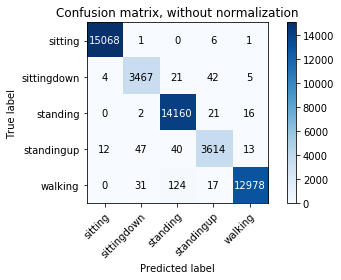

In [170]:
# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_test_predict, classes=classes,
                      title='Confusion matrix, without normalization')
pass

Normalized confusion matrix
[[9.99469355e-01 6.63305917e-05 0.00000000e+00 3.97983550e-04
  6.63305917e-05]
 [1.13026279e-03 9.79655270e-01 5.93387963e-03 1.18677593e-02
  1.41282848e-03]
 [0.00000000e+00 1.40854990e-04 9.97253328e-01 1.47897739e-03
  1.12683992e-03]
 [3.22061192e-03 1.26140633e-02 1.07353731e-02 9.69940955e-01
  3.48899624e-03]
 [0.00000000e+00 2.35741445e-03 9.42965779e-03 1.29277567e-03
  9.86920152e-01]]


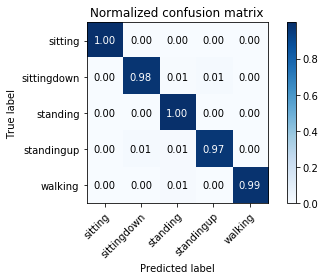

In [171]:
# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_test_predict, classes=classes, normalize=True,
                      title='Normalized confusion matrix')
pass

# Выводы

Как видно из ошибки на тренировке (0.007788309772905677) и ошибки на тесте (0.008110283759307708) модель не была переобучена

Данная модель kNN очень хорошо подходит для этой задачи на данно датасете кол-ве соседей равном одному

# PCA

## SVM without PCA

In [38]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA

In [41]:
%%time
clf = SVC()
clf.fit(X_train, y_train)
err_train = np.mean(y_train != clf.predict(X_train))
err_test = np.mean(y_test != clf.predict(X_test))
Accuracy = clf.score(X_test, y_test)
print("err_train & err_test")
print(err_train, err_test)
print(Accuracy, "accuracy")

/home/aboltachev/.local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


err_train & err_test
0.015136748229733576 0.016280941839404307
0.9837190581605957 accuracy
CPU times: user 2min 57s, sys: 124 ms, total: 2min 57s
Wall time: 2min 57s


In [43]:
y_test_predict = clf.predict(X_test)

Confusion matrix, without normalization
[[15058     0     0    18     0]
 [   12  3415    50    38    24]
 [    0     9 14121    23    46]
 [   10    90    87  3523    16]
 [    0    38   326    22 12764]]


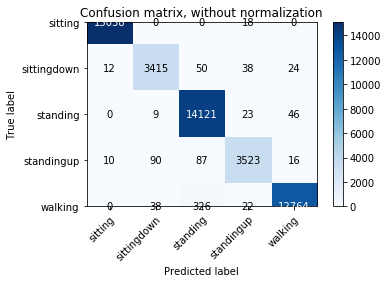

In [46]:
# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_test_predict, classes=classes,
                      title='Confusion matrix, without normalization')
pass

Normalized confusion matrix
[[9.98806049e-01 0.00000000e+00 0.00000000e+00 1.19395065e-03
  0.00000000e+00]
 [3.39078836e-03 9.64961854e-01 1.41282848e-02 1.07374965e-02
  6.78157672e-03]
 [0.00000000e+00 6.33847454e-04 9.94506655e-01 1.61983238e-03
  3.23966477e-03]
 [2.68384326e-03 2.41545894e-02 2.33494364e-02 9.45517982e-01
  4.29414922e-03]
 [0.00000000e+00 2.88973384e-03 2.47908745e-02 1.67300380e-03
  9.70646388e-01]]


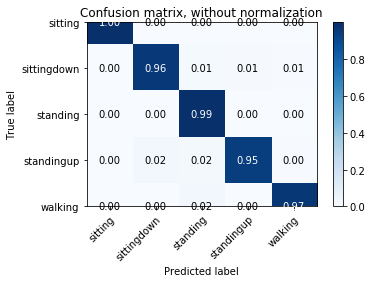

In [47]:
# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_test_predict, classes=classes, normalize=True,
                      title='Confusion matrix, without normalization')
pass

## SVM with PCA

In [39]:
pca = PCA(n_components='mle')# adjust yourself
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components='mle', random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [40]:
X_t_train = pca.transform(X_train)
X_t_test = pca.transform(X_test)

In [48]:
%%time
clf = SVC()
clf.fit(X_t_train, y_train)
err_train = np.mean(y_train != clf.predict(X_t_train))
err_test = np.mean(y_test != clf.predict(X_t_test))
Accuracy = clf.score(X_t_test, y_test)
print("err_train & err_test")
print(err_train, err_test)
print(Accuracy, "accuracy")

/home/aboltachev/.local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


err_train & err_test
0.01466237720259093 0.01577782249949688
0.9842221775005031 accuracy
CPU times: user 2min 51s, sys: 66.7 ms, total: 2min 51s
Wall time: 2min 51s


In [49]:
y_test_predict = clf.predict(X_t_test)

Confusion matrix, without normalization
[[15058     0     0    18     0]
 [   11  3419    50    35    24]
 [    0     8 14124    22    45]
 [   10    87    85  3528    16]
 [    0    34   318    21 12777]]


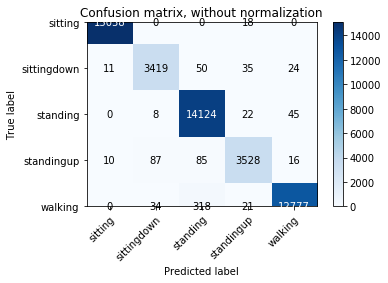

In [50]:
# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_test_predict, classes=classes,
                      title='Confusion matrix, without normalization')
pass

Normalized confusion matrix
[[9.98806049e-01 0.00000000e+00 0.00000000e+00 1.19395065e-03
  0.00000000e+00]
 [3.10822266e-03 9.66092116e-01 1.41282848e-02 9.88979938e-03
  6.78157672e-03]
 [0.00000000e+00 5.63419959e-04 9.94717938e-01 1.54940489e-03
  3.16923727e-03]
 [2.68384326e-03 2.33494364e-02 2.28126677e-02 9.46859903e-01
  4.29414922e-03]
 [0.00000000e+00 2.58555133e-03 2.41825095e-02 1.59695817e-03
  9.71634981e-01]]


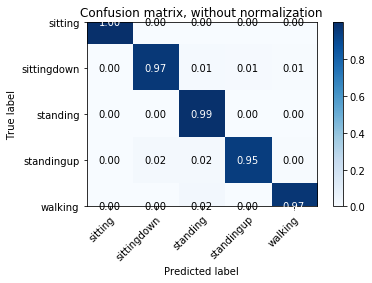

In [51]:
# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_test_predict, classes=classes, normalize=True,
                      title='Confusion matrix, without normalization')
pass

### Вывод: При использовании PCA ошибка на train упала на ~0.1% и на test ~0.1%, а точность выросла ~ 0.1%

## kNN with PCA

In [53]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

nnb = list(range(1,31))
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10, n_jobs=-1, verbose=10)
grid.fit(X_t_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   14.9s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   19.5s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   28.1s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   37.7s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   50.8s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:  3

0.007788309772905677 1


[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  6.5min finished


In [54]:
best_classifier = grid.best_estimator_

In [55]:
y_test_predict = best_classifier.predict(X_t_test)
err_test  = np.mean(y_test  != y_test_predict)

In [56]:
err_test

0.008110283759307708

Confusion matrix, without normalization
[[15068     1     0     6     1]
 [    4  3467    21    42     5]
 [    0     2 14160    21    16]
 [   12    47    40  3614    13]
 [    0    31   124    17 12978]]


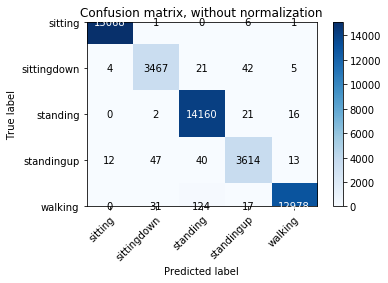

In [57]:
# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_test_predict, classes=classes,
                      title='Confusion matrix, without normalization')
pass

Normalized confusion matrix
[[9.99469355e-01 6.63305917e-05 0.00000000e+00 3.97983550e-04
  6.63305917e-05]
 [1.13026279e-03 9.79655270e-01 5.93387963e-03 1.18677593e-02
  1.41282848e-03]
 [0.00000000e+00 1.40854990e-04 9.97253328e-01 1.47897739e-03
  1.12683992e-03]
 [3.22061192e-03 1.26140633e-02 1.07353731e-02 9.69940955e-01
  3.48899624e-03]
 [0.00000000e+00 2.35741445e-03 9.42965779e-03 1.29277567e-03
  9.86920152e-01]]


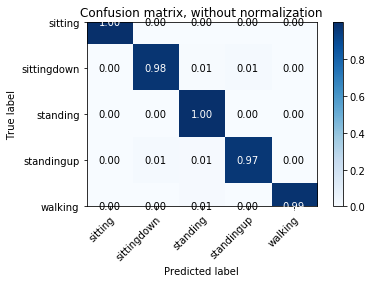

In [58]:
# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_test_predict, classes=classes, normalize=True,
                      title='Confusion matrix, without normalization')
pass

### Вывод: При использовании PCA на kNN не было получено ни ухудшений ни улучшений 

# MLP обучение

In [38]:
from sklearn.neural_network import MLPClassifier
alpha_arr = np.logspace(-3, 2, 21)
num_hidden_ns = list(range(50, 301, 50))
test_err = []
train_err = []
for num_hidden_n in num_hidden_ns:
    tmp_train_err = []
    tmp_test_err = []
    for alpha in alpha_arr:
        mlp_model = MLPClassifier(alpha=alpha, hidden_layer_sizes=(num_hidden_n,), 
                                  solver='lbfgs', activation='logistic', random_state=42)
        mlp_model.fit(X_train, y_train)
        y_train_pred = mlp_model.predict(X_train)
        y_test_pred = mlp_model.predict(X_test)
        tmp_train_err.append(np.mean(y_train != y_train_pred))
        tmp_test_err.append(np.mean(y_test != y_test_pred))
    test_err.append(tmp_test_err)
    train_err.append(tmp_train_err)

#### Ниже представлены графики зависимости ошибки от значения alpha для нейронной сети, которая состоит из одного скрытого слоя. Здесь представлено 6 конфигураций скрытого слоя (50, 100, 150, 200, 250 и 300 нейронов)

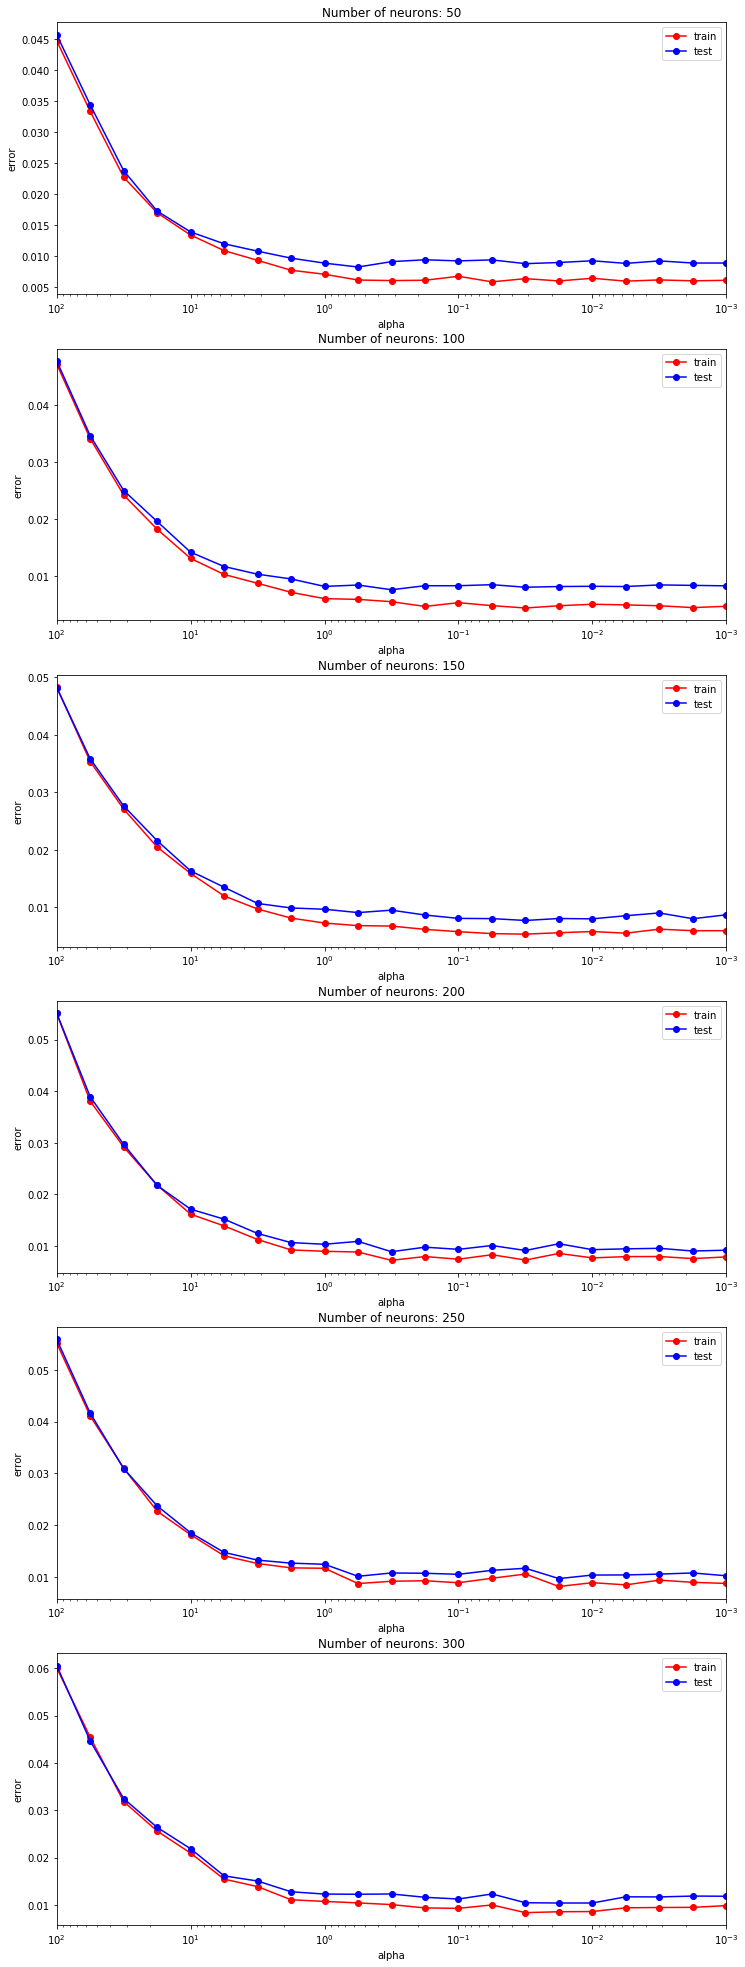

In [107]:
fig, axs = plt.subplots(len(num_hidden_ns), figsize=(12, 35))
for i, num_hidden_n in enumerate(num_hidden_ns):
    axs[i].set_title(f'Number of neurons: {num_hidden_n}')
    axs[i].semilogx(alpha_arr, train_err[i], 'r-o', label = 'train')
    axs[i].semilogx(alpha_arr, test_err[i], 'b-o', label = 'test')
    axs[i].set(xlabel='alpha', ylabel='error')
    axs[i].set_xlim([np.max(alpha_arr), np.min(alpha_arr)])
    axs[i].legend()
pass

In [108]:
train_err_np = np.matrix(train_err)
test_err_np = np.matrix(test_err)

### Нейронная сеть с параметрами для минимальной ошибки на обучении

In [109]:
js_min_train = train_err_np.argmin(1)
tmp = np.array([train_err_np[i, j] for i, j in enumerate(js_min_train)])
i_min_train = tmp.argmin()
j_min_train = js_min_train[i_min_train, 0]
print(f"The best parameters for train (train err = {train_err_np[i_min_train,j_min_train]:3.4f} "
      f"test err = {test_err_np[i_min_train,j_min_train]:3.4f}): "
      f"alpha = {alpha_arr[j_min_train]:3.4f},\tnum_neur = {num_hidden_ns[i_min_train]}")

The best parameters for train (train err = 0.0045 test err = 0.0081): alpha = 0.0316,	num_neur = 100


In [112]:
best_model_for_train = MLPClassifier(alpha=alpha_arr[j_min_train], hidden_layer_sizes=(num_hidden_ns[i_min_train],), 
                                     solver='lbfgs', activation='logistic', random_state=42)
best_model_for_train.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=0.03162277660168379,
              batch_size='auto', beta_1=0.9, beta_2=0.999, early_stopping=False,
              epsilon=1e-08, hidden_layer_sizes=(100,),
              learning_rate='constant', learning_rate_init=0.001, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=42, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=True,
              warm_start=False)

In [114]:
y_test_predict = best_model_for_train.predict(X_test)

Confusion matrix, without normalization


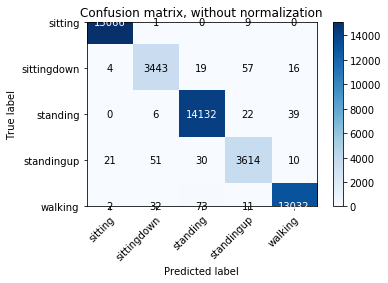

In [126]:
# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_test_predict, classes=classes,
                      title='Confusion matrix, without normalization')
pass

Normalized confusion matrix


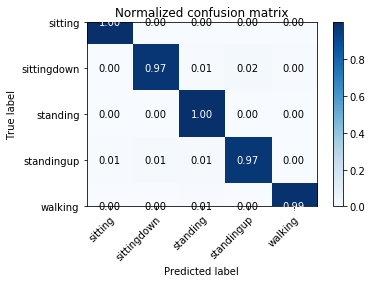

In [127]:
# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_test_predict, classes=classes, normalize=True,
                      title='Normalized confusion matrix')
pass

### Нейронная сеть с параметрами для минимальной ошибки на тесте

In [110]:
js_min_test = test_err_np.argmin(1)
tmp = np.array([test_err_np[i, j] for i, j in enumerate(js_min_test)])
i_min_test = tmp.argmin()
j_min_test = js_min_test[i_min_test, 0]
print(f"The best parameters for test (train err = {train_err_np[i_min_test,j_min_test]:3.4f} "
      f"test err = {test_err_np[i_min_test,j_min_test]:3.4f}): "
      f"alpha = {alpha_arr[j_min_test]:3.4f},\tnum_neur = {num_hidden_ns[i_min_test]}")

The best parameters for test (train err = 0.0056 test err = 0.0077): alpha = 0.3162,	num_neur = 100


In [113]:
best_model_for_test = MLPClassifier(alpha=alpha_arr[j_min_test], hidden_layer_sizes=(num_hidden_ns[i_min_test],), 
                                    solver='lbfgs', activation='logistic', random_state=42)
best_model_for_test.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=0.31622776601683794,
              batch_size='auto', beta_1=0.9, beta_2=0.999, early_stopping=False,
              epsilon=1e-08, hidden_layer_sizes=(100,),
              learning_rate='constant', learning_rate_init=0.001, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=42, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [128]:
y_test_predict = best_model_for_test.predict(X_test)

Confusion matrix, without normalization


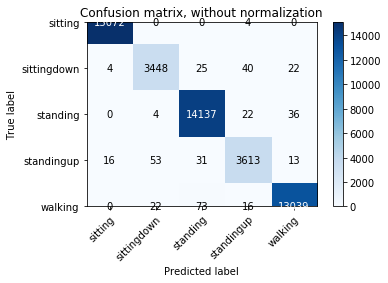

In [129]:
# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_test_predict, classes=classes,
                      title='Confusion matrix, without normalization')
pass

Normalized confusion matrix


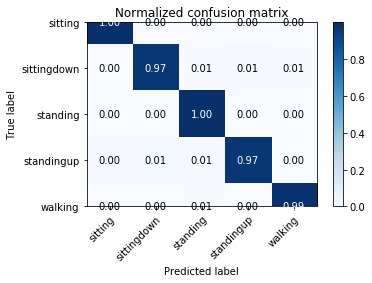

In [130]:
# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_test_predict, classes=classes, normalize=True,
                      title='Normalized confusion matrix')
pass

## Выводы

При данных конфигурациях нейронной сети не наблюдалось недообучения и переобучения. Также можно видеть, что более точную классификацию дет нейронная сеть с маньшими значениями alpha и в меру меньшим количеством нейронов на скрытом слое. Лушчие параметры: alpha = 0.3162, количество нейронов = 100. Данная конфигурация оказалась лучшим вариантом классификатора из рассмотреных в данной работе

# MLP with PCA

In [36]:
from sklearn.decomposition import PCA
pca = PCA(n_components='mle')# adjust yourself
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components='mle', random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [37]:
X_t_train = pca.transform(X_train)
X_t_test = pca.transform(X_test)

In [56]:
X_t_train.shape[1], X_train.shape[1]

(16, 17)

In [38]:
from sklearn.neural_network import MLPClassifier
alpha_arr = np.logspace(-3, 2, 21)
num_hidden_ns = list(range(50, 301, 50))
test_err = []
train_err = []
for num_hidden_n in tqdm(num_hidden_ns):
    tmp_train_err = []
    tmp_test_err = []
    for alpha in tqdm(alpha_arr):
        mlp_model = MLPClassifier(alpha=alpha, hidden_layer_sizes=(num_hidden_n,), 
                                  solver='lbfgs', activation='logistic', random_state=42,
                                  verbose=True)
        mlp_model.fit(X_t_train, y_train)
        y_train_pred = mlp_model.predict(X_t_train)
        y_test_pred = mlp_model.predict(X_t_test)
        tmp_train_err.append(np.mean(y_train != y_train_pred))
        tmp_test_err.append(np.mean(y_test != y_test_pred))
    test_err.append(tmp_test_err)
    train_err.append(tmp_train_err)

#### Ниже представлены графики зависимости ошибки от значения alpha для нейронной сети, которая состоит из одного скрытого слоя. Здесь представлено 6 конфигураций скрытого слоя (50, 100, 150, 200, 250 и 300 нейронов)

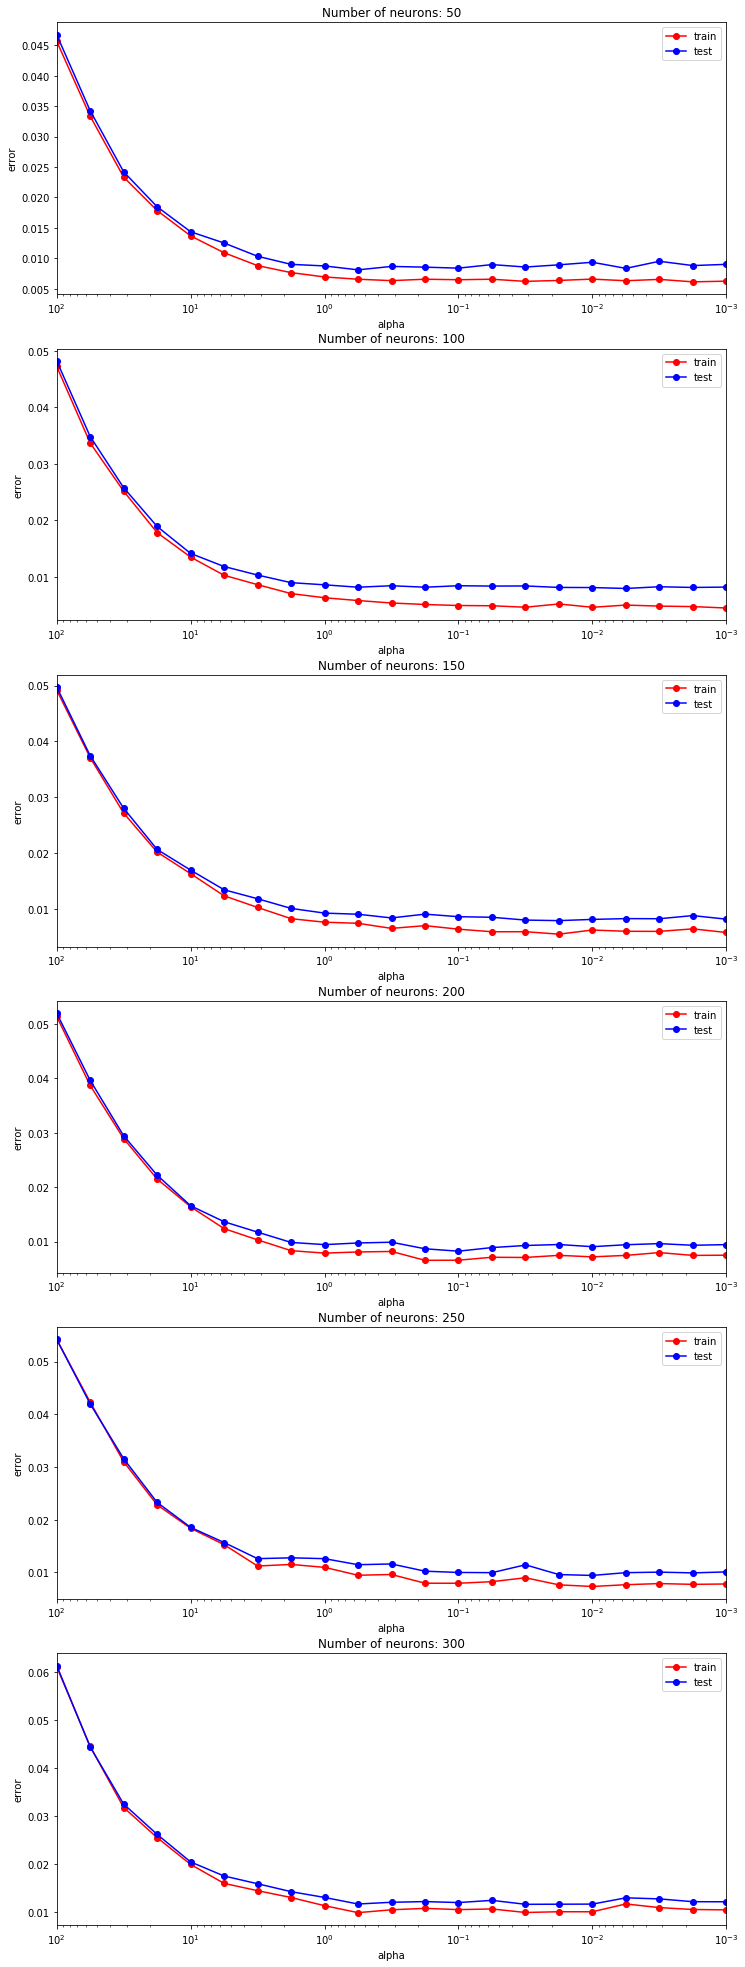

In [39]:
fig, axs = plt.subplots(len(num_hidden_ns), figsize=(12, 35))
for i, num_hidden_n in enumerate(num_hidden_ns):
    axs[i].set_title(f'Number of neurons: {num_hidden_n}')
    axs[i].semilogx(alpha_arr, train_err[i], 'r-o', label = 'train')
    axs[i].semilogx(alpha_arr, test_err[i], 'b-o', label = 'test')
    axs[i].set(xlabel='alpha', ylabel='error')
    axs[i].set_xlim([np.max(alpha_arr), np.min(alpha_arr)])
    axs[i].legend()
pass

In [40]:
train_err_np = np.matrix(train_err)
test_err_np = np.matrix(test_err)

### Нейронная сеть с параметрами для минимальной ошибки на обучении

In [43]:
js_min_train = train_err_np.argmin(1)
tmp = np.array([train_err_np[i, j] for i, j in enumerate(js_min_train)])
i_min_train = tmp.argmin()
j_min_train = js_min_train[i_min_train, 0]
print(f"The best parameters for train (train err = {train_err_np[i_min_train,j_min_train]:3.4f} "
      f"test err = {test_err_np[i_min_train,j_min_train]:3.4f}): "
      f"alpha = {alpha_arr[j_min_train]:3.4f},\tnum_neur = {num_hidden_ns[i_min_train]}")

The best parameters for train (train err = 0.0045 test err = 0.0082): alpha = 0.0010,	num_neur = 100


In [44]:
best_model_for_train = MLPClassifier(alpha=alpha_arr[j_min_train], hidden_layer_sizes=(num_hidden_ns[i_min_train],), 
                                     solver='lbfgs', activation='logistic', random_state=42)
best_model_for_train.fit(X_t_train, y_train)

MLPClassifier(activation='logistic', alpha=0.001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=42, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [45]:
y_test_predict = best_model_for_train.predict(X_t_test)

(5.0, 0.0)

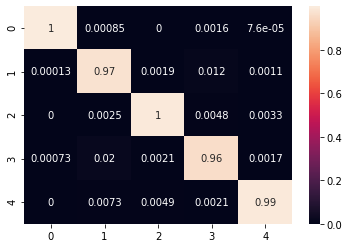

In [50]:
cnf_matrix = confusion_matrix(y_test, y_test_predict, labels=list(range(len(classes))))
plt.figure()
ax = sns.heatmap(cnf_matrix / cnf_matrix.astype(np.float).sum(axis=1), annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

### Нейронная сеть с параметрами для минимальной ошибки на тесте

In [51]:
js_min_test = test_err_np.argmin(1)
tmp = np.array([test_err_np[i, j] for i, j in enumerate(js_min_test)])
i_min_test = tmp.argmin()
j_min_test = js_min_test[i_min_test, 0]
print(f"The best parameters for test (train err = {train_err_np[i_min_test,j_min_test]:3.4f} "
      f"test err = {test_err_np[i_min_test,j_min_test]:3.4f}): "
      f"alpha = {alpha_arr[j_min_test]:3.4f},\tnum_neur = {num_hidden_ns[i_min_test]}")

The best parameters for test (train err = 0.0054 test err = 0.0079): alpha = 0.0178,	num_neur = 150


In [52]:
best_model_for_test = MLPClassifier(alpha=alpha_arr[j_min_test], hidden_layer_sizes=(num_hidden_ns[i_min_test],), 
                                    solver='lbfgs', activation='logistic', random_state=42)
best_model_for_test.fit(X_t_train, y_train)

MLPClassifier(activation='logistic', alpha=0.01778279410038923,
              batch_size='auto', beta_1=0.9, beta_2=0.999, early_stopping=False,
              epsilon=1e-08, hidden_layer_sizes=(150,),
              learning_rate='constant', learning_rate_init=0.001, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=42, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [53]:
y_test_predict = best_model_for_test.predict(X_t_test)

(5.0, 0.0)

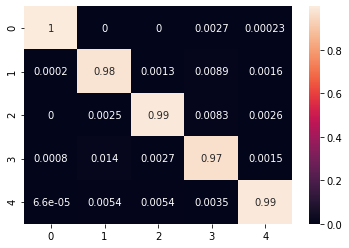

In [54]:
cnf_matrix = confusion_matrix(y_test, y_test_predict, labels=list(range(len(classes))))
plt.figure()
ax = sns.heatmap(cnf_matrix / cnf_matrix.astype(np.float).sum(axis=1), annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

## Выводы

При данных конфигурациях нейронной сети не наблюдалось недообучения и переобучения даже после применения PCA. Также можно видеть, что более точную классификацию дет нейронная сеть с маньшими значениями alpha и в меру меньшим количеством нейронов на скрытом слое что наблюдалось и до применения PCA. Лушчие параметры: alpha = 0.0178, количество нейронов = 150. После применения PCA были получены примерно такие же результаты как и до использования PCA. Но при этом лучшие результаты были получены на меньших значениях alpha в отличае от лучших конфигураций без применения PCA. В обоих лучших конфигурациях ошибка на тесте получилась чуть хуже, чем до применения PCA, вожможно при большем уменьшении количества признаков ошибка будет заметно больше, чем сейчас.